In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import cross_validation, metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [2]:
#Read files:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [4]:
# preview the data
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train_df.describe() #Get summary of numerical variables

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.describe(include=['O']) #Get summary of categorical variables

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
# Here NA is a value for the feature Alley
train_df['Alley'].fillna('No_Alley',inplace=True)
test_df['Alley'].fillna('No_Alley',inplace=True)

In [8]:
# Here NA is a value for the feature BsmtQual
train_df['BsmtQual'].fillna('No_Basement',inplace=True)
test_df['BsmtQual'].fillna('No_Basement',inplace=True)

In [9]:
# Here NA is a value for the feature BsmtCond
train_df['BsmtCond'].fillna('No_Basement',inplace=True)
test_df['BsmtCond'].fillna('No_Basement',inplace=True)

In [10]:
# Here NA is a value for the feature BsmtExposure
train_df['BsmtExposure'].fillna('No_Basement',inplace=True)
test_df['BsmtExposure'].fillna('No_Basement',inplace=True)

In [11]:
# Here NA is a value for the feature BsmtFinType1
train_df['BsmtFinType1'].fillna('No_Basement',inplace=True)
test_df['BsmtFinType1'].fillna('No_Basement',inplace=True)

In [12]:
# Here NA is a value for the feature BsmtFinType2
train_df['BsmtFinType2'].fillna('No_Basement',inplace=True)
test_df['BsmtFinType2'].fillna('No_Basement',inplace=True)

In [13]:
# Here NA is a value for the feature FireplaceQu
train_df['FireplaceQu'].fillna('No_Fireplace',inplace=True)
test_df['FireplaceQu'].fillna('No_Fireplace',inplace=True)

In [14]:
# Here NA is a value for the feature GarageType
train_df['GarageType'].fillna('No_Garage',inplace=True)
test_df['GarageType'].fillna('No_Garage',inplace=True)

In [15]:
# Here NA is a value for the feature GarageFinish
train_df['GarageFinish'].fillna('No_Garage',inplace=True)
test_df['GarageFinish'].fillna('No_Garage',inplace=True)

In [16]:
# Here NA is a value for the feature GarageQual
train_df['GarageQual'].fillna('No_Garage',inplace=True)
test_df['GarageQual'].fillna('No_Garage',inplace=True)

In [17]:
# Here NA is a value for the feature GarageCond
train_df['GarageCond'].fillna('No_Garage',inplace=True)
test_df['GarageCond'].fillna('No_Garage',inplace=True)

In [18]:
# Here NA is a value for the feature PoolQC
train_df['PoolQC'].fillna('No_Pool',inplace=True)
test_df['PoolQC'].fillna('No_Pool',inplace=True)

In [19]:
# Here NA is a value for the feature Fence
train_df['Fence'].fillna('No_Fence',inplace=True)
test_df['Fence'].fillna('No_Fence',inplace=True)

In [20]:
# Here NA is a value for the feature MiscFeature
train_df['MiscFeature'].fillna('None',inplace=True)
test_df['MiscFeature'].fillna('None',inplace=True)

In [21]:
# Here None is a value for the feature MasVnrType
train_df['MasVnrType'].fillna('None',inplace=True)
test_df['MasVnrType'].fillna('None',inplace=True)

In [22]:
train_df.describe(include=['O']) #Get summary of categorical variables

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


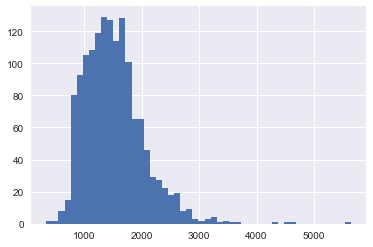

In [23]:
# plotting the histogram of GrLivArea
train_df['GrLivArea'].hist(bins=50)
plt.show()

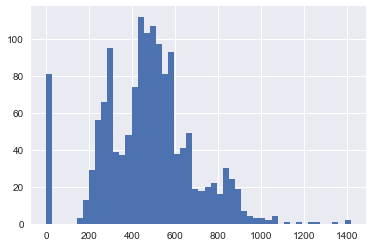

In [24]:
# plotting the histogram of GarageArea
train_df['GarageArea'].hist(bins=50)
plt.show()

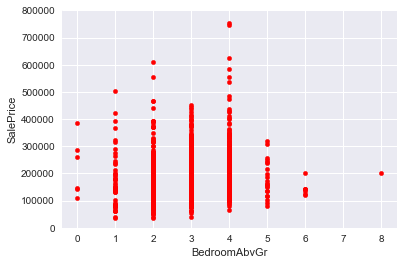

In [25]:
#scatter plot BedroomAbvGr/saleprice
var = 'BedroomAbvGr'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');


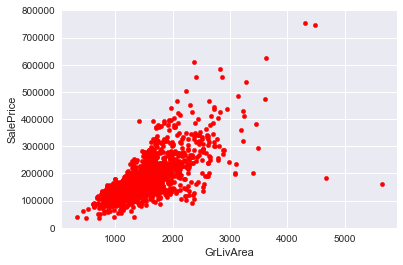

In [26]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

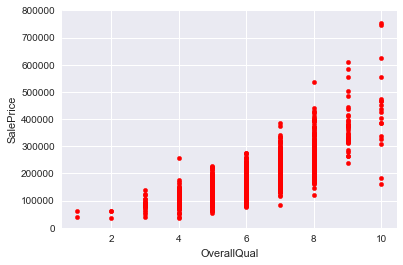

In [27]:
#scatter plot OverallQual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

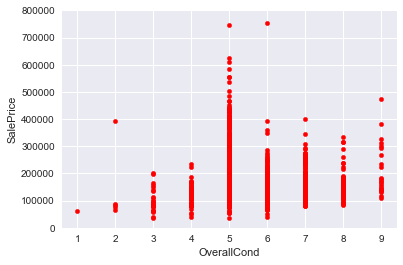

In [28]:
#scatter plot OverallCond/saleprice
var = 'OverallCond'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

In [29]:
#creating new_variable
train_df['Overallscore']=train_df['OverallQual']+train_df['OverallCond']
test_df['Overallscore']=test_df['OverallQual']+test_df['OverallCond']
#dropping irrevalent variables
train_df = train_df.drop(['OverallQual', 'OverallCond'], axis=1)
test_df = test_df.drop(['OverallQual', 'OverallCond'], axis=1)

In [30]:
#creating new_variable
train_df['BsmtFin']=train_df['BsmtFinSF1']+train_df['BsmtFinSF2']
test_df['BsmtFin']=test_df['BsmtFinSF1']+test_df['BsmtFinSF2']
#dropping irrevalent variables
train_df = train_df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF'], axis=1)
test_df = test_df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF'], axis=1)

In [31]:
# converting some categorical features to ordinal
Garage_mapping = {"No_Garage": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_df['GarageQual'] = train_df['GarageQual'].map(Garage_mapping)
test_df['GarageQual'] = test_df['GarageQual'].map(Garage_mapping)
train_df['GarageCond'] = train_df['GarageCond'].map(Garage_mapping)
test_df['GarageCond'] = test_df['GarageCond'].map(Garage_mapping)
#creating new_variable
train_df['Garagescore']=train_df['GarageQual']+train_df['GarageCond']
test_df['Garagescore']=test_df['GarageQual']+test_df['GarageCond']
#dropping irrevalent variables
train_df = train_df.drop(['GarageQual', 'GarageCond'], axis=1)
test_df = test_df.drop(['GarageQual', 'GarageCond'], axis=1)
train_df['Garagescore'].head(10)

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    5
9    7
Name: Garagescore, dtype: int64

In [32]:
# converting some categorical features to ordinal
Bsmt_mapping = {"No_Basement": 0, "Unf":1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ":6}
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].map(Bsmt_mapping)
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].map(Bsmt_mapping)
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].map(Bsmt_mapping)
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].map(Bsmt_mapping)
#creating new_variable
train_df['BsmtFinType']=train_df['BsmtFinType1']+train_df['BsmtFinType2']
test_df['BsmtFinType']=test_df['BsmtFinType1']+test_df['BsmtFinType2']
#dropping irrevalent variables
train_df = train_df.drop(['BsmtFinType1', 'BsmtFinType2'], axis=1)
test_df = test_df.drop(['BsmtFinType1', 'BsmtFinType2'], axis=1)
train_df['BsmtFinType'].head(10)

0    7
1    6
2    7
3    6
4    7
5    7
6    7
7    9
8    2
9    7
Name: BsmtFinType, dtype: int64

In [33]:
#dropping irrevalent variables
train_df = train_df.drop(['Condition2'], axis=1)
test_df = test_df.drop(['Condition2'], axis=1)

In [34]:
# converting some categorical features to ordinal
Exter_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_df['ExterQual'] = train_df['ExterQual'].map(Exter_mapping)
test_df['ExterQual'] = test_df['ExterQual'].map(Exter_mapping)
train_df['ExterCond'] = train_df['ExterCond'].map(Exter_mapping)
test_df['ExterCond'] = test_df['ExterCond'].map(Exter_mapping)
#creating new_variable
train_df['Exterscore']=train_df['ExterQual']+train_df['ExterCond']
test_df['Exterscore']=test_df['ExterQual']+test_df['ExterCond']
#dropping irrevalent variables
train_df = train_df.drop(['ExterQual', 'ExterCond'], axis=1)
test_df = test_df.drop(['ExterQual', 'ExterCond'], axis=1)
train_df['Exterscore'].head(10)

0    7
1    6
2    7
3    6
4    7
5    6
6    7
7    6
8    6
9    6
Name: Exterscore, dtype: int64

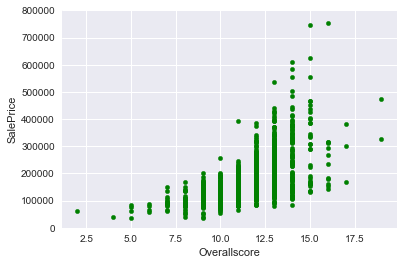

In [35]:
#scatter plot Overallscore/saleprice
var = 'Overallscore'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='green');

In [36]:
# Determining the years from Original construction date
# Years:
train_df['Age_of_House'] = 2018 - train_df['YearBuilt']
test_df['Age_of_House'] = 2018 - test_df['YearBuilt']
train_df['Age_of_House'].describe()

count    1460.000000
mean       46.732192
std        30.202904
min         8.000000
25%        18.000000
50%        45.000000
75%        64.000000
max       146.000000
Name: Age_of_House, dtype: float64

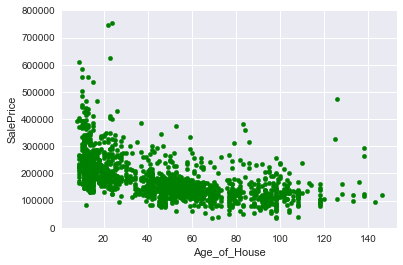

In [37]:
#scatter plot Age_of_House/saleprice
var = 'Age_of_House'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='green');

In [38]:
# dropping YearBuilt feature
train_df = train_df.drop(['YearBuilt'], axis=1)
test_df = test_df.drop(['YearBuilt'], axis=1)

In [39]:
# Determining the years from Remodelling date
# Years:
train_df['Age_of_Remod_House'] = 2018 - train_df['YearRemodAdd']
test_df['Age_of_Remod_House'] = 2018 - test_df['YearRemodAdd']
train_df['Age_of_Remod_House'].describe()

count    1460.000000
mean       33.134247
std        20.645407
min         8.000000
25%        14.000000
50%        24.000000
75%        51.000000
max        68.000000
Name: Age_of_Remod_House, dtype: float64

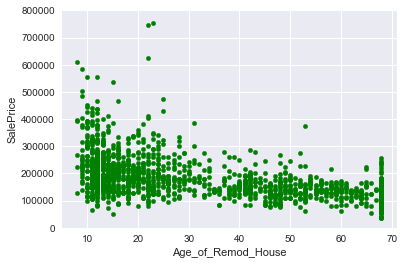

In [40]:
#scatter plot Age_of_Remod_House/saleprice
var = 'Age_of_Remod_House'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='green');

In [41]:
# dropping YearRemodAdd feature
train_df = train_df.drop(['YearRemodAdd'], axis=1)
test_df = test_df.drop(['YearRemodAdd'], axis=1)

In [42]:
# Determining the years from garage built date
# Years:
train_df['Age_of_garage'] = 2018 - train_df['GarageYrBlt']
test_df['Age_of_garage'] = 2018 - test_df['GarageYrBlt']
train_df['Age_of_garage'].describe()

count    1379.000000
mean       39.493836
std        24.689725
min         8.000000
25%        16.000000
50%        38.000000
75%        57.000000
max       118.000000
Name: Age_of_garage, dtype: float64

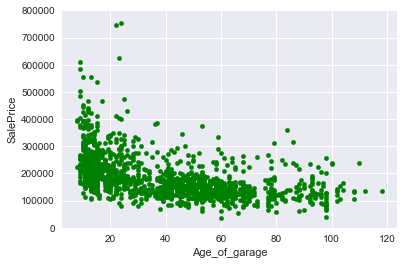

In [43]:
#scatter plot Age_of_House/saleprice
var = 'Age_of_garage'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='green');

In [44]:
# dropping GarageYrBlt feature
train_df = train_df.drop(['GarageYrBlt'], axis=1)
test_df = test_df.drop(['GarageYrBlt'], axis=1)

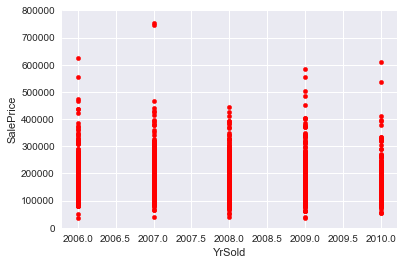

In [45]:
#scatter plot YrSold/saleprice
var = 'YrSold'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

In [46]:
#dropping irrevalent variables
train_df = train_df.drop(['YrSold', 'MoSold'], axis=1)
test_df = test_df.drop(['YrSold', 'MoSold'], axis=1)

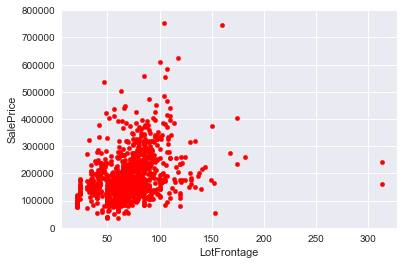

In [47]:
#scatter plot LotFrontage/saleprice
var = 'LotFrontage'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

In [48]:
#dropping irrevalent variables
train_df = train_df.drop(['LotFrontage'], axis=1)
test_df = test_df.drop(['LotFrontage'], axis=1)

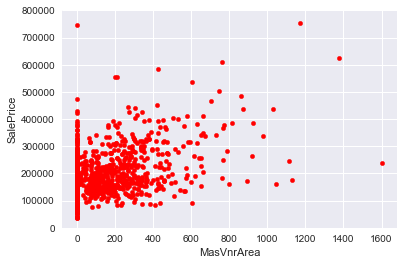

In [49]:
#scatter plot MasVnrArea/saleprice
var = 'MasVnrArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

In [50]:
#dropping irrevalent variables
train_df = train_df.drop(['MasVnrArea'], axis=1)
test_df = test_df.drop(['MasVnrArea'], axis=1)

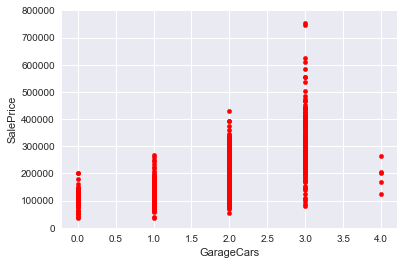

In [51]:
#scatter plot GarageCars/saleprice
var = 'GarageCars'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

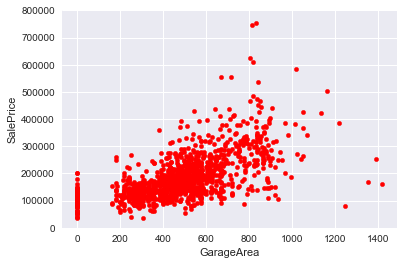

In [52]:
#scatter plot GarageArea/saleprice
var = 'GarageArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), color='red');

In [53]:
#dropping irrevalent variables
train_df = train_df.drop(['GarageArea'], axis=1)
test_df = test_df.drop(['GarageArea'], axis=1)

In [54]:
#missing data for training set
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Age_of_garage,81,0.055479
Electrical,1,0.000685
BsmtUnfSF,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
Foundation,0,0.000000
BsmtQual,0,0.000000
BsmtCond,0,0.000000
BsmtExposure,0,0.000000
Heating,0,0.000000


In [55]:
#missing data for test set
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Age_of_garage,78,0.053461
MSZoning,4,0.002742
Functional,2,0.001371
Utilities,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
BsmtFin,1,0.000685
GarageCars,1,0.000685
SaleType,1,0.000685
BsmtUnfSF,1,0.000685


In [56]:
# Age_of_garage is missing where there is no garage
train_df['Age_of_garage'].fillna(0,inplace=True)
test_df['Age_of_garage'].fillna(0,inplace=True)

In [57]:
 #Treating missing values
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0],inplace=True)
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0],inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0],inplace=True)
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0],inplace=True)
test_df['Functional'].fillna(test_df['Functional'].mode()[0],inplace=True)
test_df['Utilities'].fillna(test_df['Utilities'].mode()[0],inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0],inplace=True)
test_df['SaleType'].fillna(test_df['SaleType'].mode()[0],inplace=True)
test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0],inplace=True)
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0],inplace=True)
test_df['BsmtFin'].fillna(0,inplace=True)
test_df['BsmtUnfSF'].fillna(0,inplace=True)
test_df['GarageCars'].fillna(0,inplace=True)

In [58]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotArea' 'Street' 'Alley' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtUnfSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageCars' 'PavedDrive' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal' 'SaleType' 'SaleCondition'
 'SalePrice' 'Overallscore' 'BsmtFin' 'Garagescore' 'BsmtFinType'
 'Exterscore' 'Age_of_House' 'Age_of_Remod_House' 'Age_of_garage']


In [59]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,6,7,4,3,4,5,5,9,6
top,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Typ,No_Fireplace,Attchd,Unf,Y,No_Pool,No_Fence,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,1360,690,870,605,1340,1453,1179,1406,1267,1198


In [60]:
# Converting all categorical variables into numeric by encoding the categories
var_mod = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtQual','BsmtCond','BsmtExposure','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
le = LabelEncoder()
for i in var_mod:
    train_df[i] = le.fit_transform(train_df[i])
    test_df[i] = le.fit_transform(test_df[i])
train_df.dtypes 

Id                      int64
MSSubClass              int64
MSZoning                int64
LotArea                 int64
Street                  int64
Alley                   int64
LotShape                int64
LandContour             int64
Utilities               int64
LotConfig               int64
LandSlope               int64
Neighborhood            int64
Condition1              int64
BldgType                int64
HouseStyle              int64
RoofStyle               int64
RoofMatl                int64
Exterior1st             int64
Exterior2nd             int64
MasVnrType              int64
Foundation              int64
BsmtQual                int64
BsmtCond                int64
BsmtExposure            int64
BsmtUnfSF               int64
Heating                 int64
HeatingQC               int64
CentralAir              int64
Electrical              int64
1stFlrSF                int64
                       ...   
KitchenQual             int64
TotRmsAbvGrd            int64
Functional

In [61]:
#dropping irrevalent variables
train_df = train_df.drop(['Id'], axis=1)

In [62]:
X_train = train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test  = test_df.drop("Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1460, 67), (1460,), (1459, 67))

In [63]:
pca = PCA(n_components=30)
X_train_reduced=pca.fit_transform(X_train)
X_train_reduced.shape

(1460, 30)

In [64]:
X_test_reduced=pca.fit_transform(X_test)
X_test_reduced.shape

(1459, 30)

In [65]:
# generic function
def modelfit(alg, dtrain_X, dtrain_Y, dtest_X):
    #Fit the algorithm on the data
    alg.fit(dtrain_X, dtrain_Y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain_X)

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain_X, dtrain_Y, cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain_Y.values, dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    
    #Predict on testing data:
    Y_pred = alg.predict(dtest_X)
    
    return Y_pred

In [66]:
# Linear Regression Model
alg1 = LinearRegression(normalize=True)
Y_pred=modelfit(alg1, X_train_reduced, Y_train, X_test_reduced)


Model Report
RMSE : 3.455e+04
CV Score : Mean - 3.514e+04 | Std - 1.481e+04 | Min - 2.212e+04 | Max - 8.534e+04


In [67]:
# Ridge Regression Model
alg2 = Ridge(alpha=0.05,normalize=True)
Y_pred=modelfit(alg2, X_train_reduced, Y_train, X_test_reduced)


Model Report
RMSE : 3.472e+04
CV Score : Mean - 3.521e+04 | Std - 1.417e+04 | Min - 2.187e+04 | Max - 8.106e+04


In [68]:
# Ridge Regression Model with original features
alg3 = Ridge(alpha=0.05,normalize=True)
Y_pred=modelfit(alg3, X_train, Y_train, X_test)


Model Report
RMSE : 3.157e+04
CV Score : Mean - 3.39e+04 | Std - 1.3e+04 | Min - 1.949e+04 | Max - 7.433e+04


In [69]:
# Decision Tree Model
alg4 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=300)
Y_pred=modelfit(alg4, X_train_reduced, Y_train, X_test_reduced)


Model Report
RMSE : 6.297e+04
CV Score : Mean - 6.463e+04 | Std - 1.176e+04 | Min - 5.289e+04 | Max - 9.526e+04


In [70]:
# Random Forest Model
alg5 = RandomForestRegressor(n_estimators=400,max_depth=20, min_samples_leaf=100, n_jobs=4)
Y_pred=modelfit(alg5, X_train_reduced, Y_train, X_test_reduced)


Model Report
RMSE : 5.17e+04
CV Score : Mean - 5.277e+04 | Std - 1.131e+04 | Min - 3.609e+04 | Max - 8.216e+04


In [71]:
# XGB regressor
alg6 = xgb.XGBRegressor(n_estimators=300, max_depth=2, learning_rate=0.1) 
Y_pred=modelfit(alg6, X_train_reduced, Y_train, X_test_reduced)


Model Report
RMSE : 1.727e+04
CV Score : Mean - 3.282e+04 | Std - 1.106e+04 | Min - 2.152e+04 | Max - 6.492e+04


In [72]:
# Tuning of parameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2, 3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.3],
    'n_estimators': [200, 350, 450, 500]
}
# Create a based model
XGBR = xgb.XGBRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = XGBR, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train_reduced, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] n_estimators=200, learning_rate=0.05, max_depth=2 ...............
[CV] n_estimators=200, learning_rate=0.05, max_depth=2 ...............
[CV] n_estimators=200, learning_rate=0.05, max_depth=2 ...............
[CV] n_estimators=200, learning_rate=0.05, max_depth=2 ...............
[CV]  n_estimators=200, learning_rate=0.05, max_depth=2, total=   0.7s
[CV]  n_estimators=200, learning_rate=0.05, max_depth=2, total=   0.7s
[CV]  n_estimators=200, learning_rate=0.05, max_depth=2, total=   0.7s
[CV] n_estimators=200, learning_rate=0.05, max_depth=2 ...............
[CV] n_estimators=350, learning_rate=0.05, max_depth=2 ...............
[CV] n_estimators=350, learning_rate=0.05, max_depth=2 ...............
[CV]  n_estimators=200, learning_rate=0.05, max_depth=2, total=   0.7s
[CV] n_estimators=350, learning_rate=0.05, max_depth=2 ...............
[CV]  n_estimators=200, learning_rate=0.05, max_depth=2, total=   0.8s
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s


[CV]  n_estimators=450, learning_rate=0.05, max_depth=3, total=   2.3s
[CV] n_estimators=500, learning_rate=0.05, max_depth=3 ...............
[CV]  n_estimators=450, learning_rate=0.05, max_depth=3, total=   2.3s
[CV] n_estimators=500, learning_rate=0.05, max_depth=3 ...............
[CV]  n_estimators=500, learning_rate=0.05, max_depth=3, total=   2.5s
[CV] n_estimators=500, learning_rate=0.05, max_depth=3 ...............
[CV]  n_estimators=500, learning_rate=0.05, max_depth=3, total=   2.5s
[CV] n_estimators=200, learning_rate=0.05, max_depth=5 ...............
[CV]  n_estimators=500, learning_rate=0.05, max_depth=3, total=   2.5s
[CV] n_estimators=200, learning_rate=0.05, max_depth=5 ...............
[CV]  n_estimators=200, learning_rate=0.05, max_depth=5, total=   1.7s
[CV] n_estimators=200, learning_rate=0.05, max_depth=5 ...............
[CV]  n_estimators=500, learning_rate=0.05, max_depth=3, total=   2.6s
[CV] n_estimators=200, learning_rate=0.05, max_depth=5 ...............
[CV]  

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min


[CV] . n_estimators=450, learning_rate=0.1, max_depth=7, total=   5.5s
[CV] n_estimators=500, learning_rate=0.1, max_depth=7 ................
[CV] . n_estimators=500, learning_rate=0.1, max_depth=7, total=   6.2s
[CV] n_estimators=500, learning_rate=0.1, max_depth=7 ................
[CV] . n_estimators=500, learning_rate=0.1, max_depth=7, total=   6.2s
[CV] n_estimators=200, learning_rate=0.3, max_depth=2 ................
[CV] . n_estimators=200, learning_rate=0.3, max_depth=2, total=   0.8s
[CV] n_estimators=200, learning_rate=0.3, max_depth=2 ................
[CV] . n_estimators=200, learning_rate=0.3, max_depth=2, total=   0.7s
[CV] n_estimators=200, learning_rate=0.3, max_depth=2 ................
[CV] . n_estimators=500, learning_rate=0.1, max_depth=7, total=   6.5s
[CV] n_estimators=200, learning_rate=0.3, max_depth=2 ................
[CV] . n_estimators=200, learning_rate=0.3, max_depth=2, total=   0.7s
[CV] n_estimators=200, learning_rate=0.3, max_depth=2 ................
[CV] .

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.9min finished


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

In [73]:
# XGB regressor with tuned parameters
alg7 = xgb.XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.05) 
Y_pred=modelfit(alg7, X_train_reduced, Y_train, X_test_reduced)


Model Report
RMSE : 1.214e+04
CV Score : Mean - 3.272e+04 | Std - 9858 | Min - 2.254e+04 | Max - 5.746e+04


In [74]:
# Using ANN
# Initialising the ANN
alg8 = Sequential()

# Adding the input layer and the first hidden layer
alg8.add(Dense(units = 256, kernel_initializer = 'normal', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
alg8.add(Dense(units = 256, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
alg8.add(Dense(units = 1, kernel_initializer = 'normal'))

# Compiling the ANN
alg8.compile(optimizer = 'adam', loss = 'mse')

# Fitting the ANN to the Training set
alg8.fit(X_train_reduced, Y_train, batch_size = 64, epochs = 800)

# Predicting the Test set results
y_pred = alg8.predict(X_test_reduced)


Epoch 1/800
1460/1460 [==============================] - 0s 265us/step - loss: 38244086579.2000
Epoch 2/800
1460/1460 [==============================] - 0s 55us/step - loss: 34887408867.2438
Epoch 3/800
1460/1460 [==============================] - 0s 51us/step - loss: 30285745929.1178
Epoch 4/800
1460/1460 [==============================] - 0s 51us/step - loss: 26822696146.4110
Epoch 5/800
1460/1460 [=

In [75]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })

submission.to_csv('submission.csv', index=False)